# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler , LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score , mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression , LogisticRegression
from scipy import stats

# Load Dataset and Data Preprocessing 

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


# Data Preprocessing

In [4]:
# Encode categorical variables using LabelEncoder
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Drug'] = le_drug.fit_transform(df['Drug'])

X = df.drop('Drug', axis=1)
y = df['Drug']
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


# Standarization, Splitting, and Fitting to Model

In [13]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[14  1  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 1  0  0  0 10]]


# Visualizations

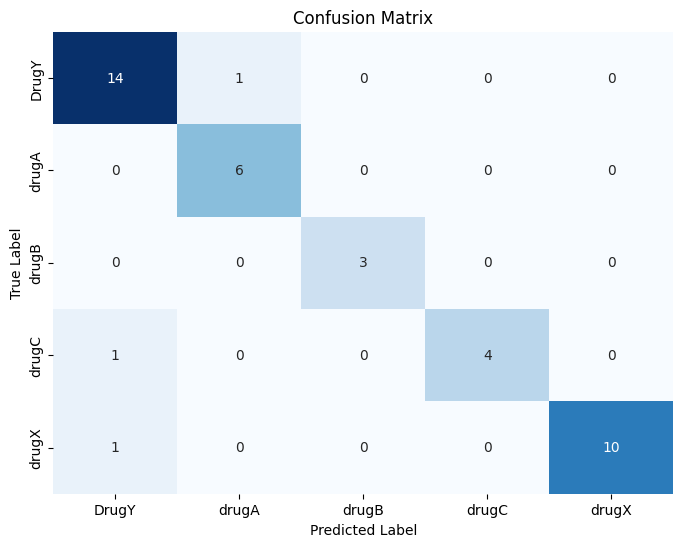

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18340\1994270482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=df, palette='Set2')


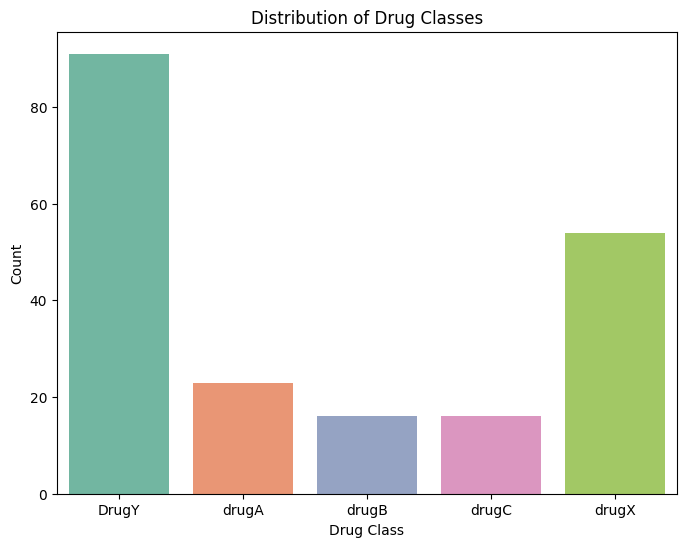

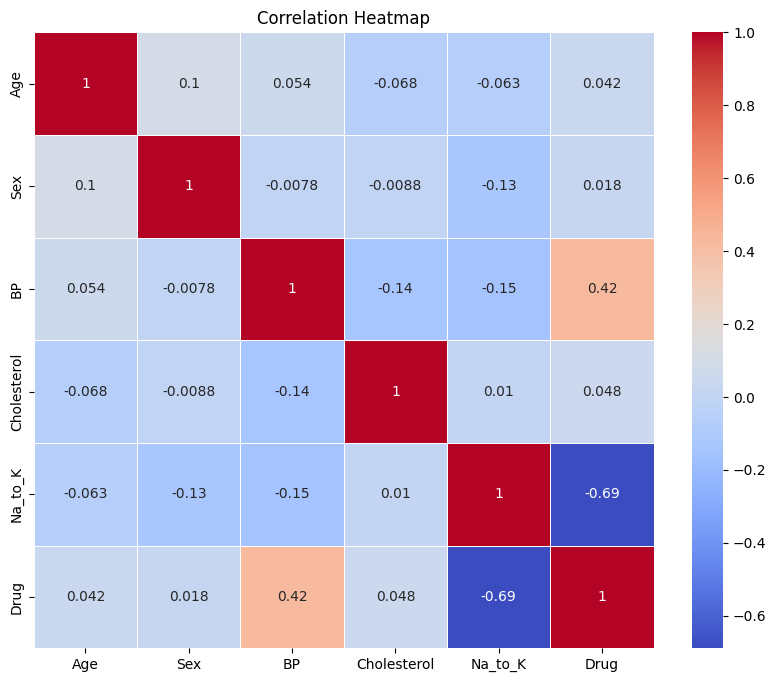

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the distribution of Drug classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Drug', data=df, palette='Set2')
plt.title('Distribution of Drug Classes')
plt.xlabel('Drug Class')
plt.ylabel('Count')
plt.xticks(ticks=range(len(le_drug.classes_)), labels=le_drug.classes_)
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Classification Report

In [14]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       1.00      0.91      0.95        11

    accuracy                           0.93        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40

